<a href="https://colab.research.google.com/github/gyasifred/NLP-Techniques/blob/main/multi_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', 'authors': '

In [3]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Utilities

In [4]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [5]:
# Split the data into train and test with 80 train / 20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
train_stats = X_train.describe()
train_stats = train_stats.transpose()

In [6]:
# Normalize the training and test data
norm_train_X = norm(X_train)
norm_test_X = norm(X_test)

In [7]:
train_Y = format_output(y_train)
test_Y = format_output(y_test)

# Build the Model

In [8]:
#Define input layer
input_layer = Input(shape = (len(norm_train_X.columns),))
first_dense = Dense(128, activation= tf.nn.relu)(input_layer)
second_dense = Dense(128, activation = tf.nn.relu)(first_dense)
# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation=tf.nn.relu)(second_dense)
# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)
# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  1152      ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 128)                  16512     ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 64)                   8256      ['dense_1[0][0]']             
                                                                                              

# Configure parameters

We specify the optimizer as well as the loss and metrics for each output

In [9]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

# Train the Model

In [10]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 2s 18ms/step - loss: 230.9989 - y1_output_loss: 110.2269 - y2_output_loss: 120.7719 - y1_output_root_mean_squared_error: 10.4989 - y2_output_root_mean_squared_error: 10.9896 - val_loss: 47.3640 - val_y1_output_loss: 16.4318 - val_y2_output_loss: 30.9321 - val_y1_output_root_mean_squared_error: 4.0536 - val_y2_output_root_mean_squared_error: 5.5617
Epoch 2/500
62/62 [==============================] - 0s 6ms/step - loss: 30.2428 - y1_output_loss: 12.1924 - y2_output_loss: 18.0504 - y1_output_root_mean_squared_error: 3.4918 - y2_output_root_mean_squared_error: 4.2486 - val_loss: 33.9733 - val_y1_output_loss: 13.1910 - val_y2_output_loss: 20.7823 - val_y1_output_root_mean_squared_error: 3.6319 - val_y2_output_root_mean_squared_error: 4.5588
Epoch 3/500
62/62 [==============================] - 0s 7ms/step - loss: 28.4232 - y1_output_loss: 10.5487 - y2_output_loss: 17.8745 - y1_output_root_mean_squared_error: 3.2479 - y2_output_root_mean_s

# Evaluate the Model and Plot Metrics

In [11]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 6ms/step - loss: 0.7920 - y1_output_loss: 0.2745 - y2_output_loss: 0.5175 - y1_output_root_mean_squared_error: 0.5239 - y2_output_root_mean_squared_error: 0.7193
Loss = 0.7919506430625916, Y1_loss = 0.2744961380958557, Y1_mse = 0.5239238142967224, Y2_loss = 0.5174545645713806, Y2_mse = 0.7193431258201599


5/5 [==============================] - 0s 9ms/step


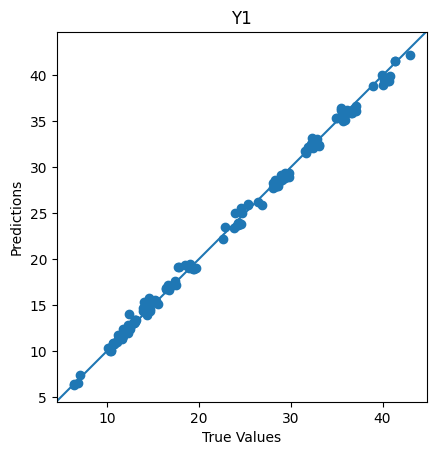

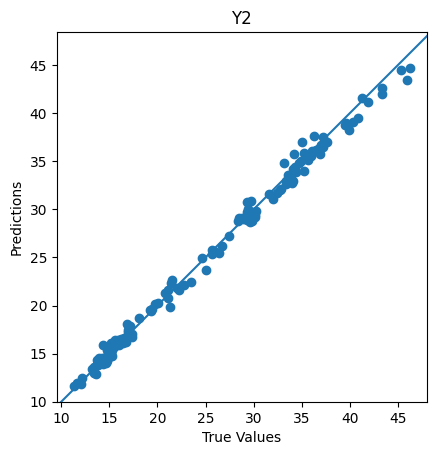

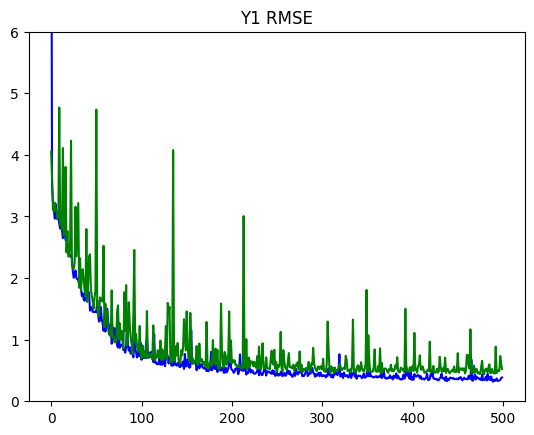

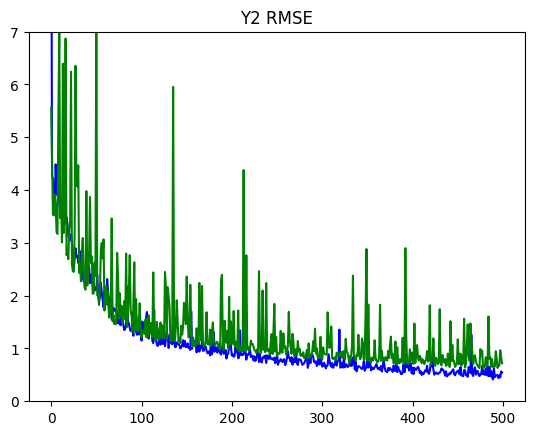

In [12]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)